In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

after we importing the dependent libs for work ,we will work on read data file
to explore what's we'r working on .
Here, we select a "No-show appointments" dataset for medical appointments information that shows out whome didn't go to their appointment schedule , their neighborhood and on which date, let's see.


In [3]:
#reading a dataset file and take a copy to work on

original_df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df=original_df.copy()
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


till this point we explored a dataset, we will go through cleaning our data

In [7]:
# check if there is a columns need to change their data
df.info()

"""we will change data type of [PatientId] to int ,[ScheduledDay] and 
[AppointmentDay] to dattime formate to date,
"""

df['PatientId'] = df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 no

In [8]:
# check if there is a null value
df.isnull().sum().sum()

# i checked for not appropriate Age and row that has Age -1
x=df.Age.min()
xLoc=df.query(f'Age == {x}')
df.drop(xLoc.index,inplace=True)
df.Age.value_counts()

# query for age level to drop it
q= df[df['Age'] <= 15]
q.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
15,99948393975,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No
21,12154843752835,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes
22,863229818887631,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes
27,12154843752835,5628345,F,2016-04-27 10:51:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,No


In [9]:
# drop rows for any patient Age less than 16 ,for whome a childern and need a parent to go with
df.drop(q.index,inplace=True)
df.Age.min()

16

In [8]:
# new shape after drop
df.shape

(86058, 14)

In [9]:
# check for duplicated rows

df.duplicated().sum()

0

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No


In [17]:
# rename ScheduledDay,AppointmentDay to be Scheduled_date and Appointment_date
# and column no-show to 'no_show'

df.rename(columns={'ScheduledDay':'Scheduled_date','AppointmentDay':'Appointment_date','no-show':'no_show'},inplace=True)


#rename all columns to lower case
df.rename(columns=lambda x:x.lower(),inplace=True)


In [12]:
import datetime

def insrt_day_col(new_col_name,dataframe,from_col,insert_idx):
    
    new_col=list()
    # new_col.clear()

    for i in range(len(dataframe[from_col])):
        new_col.append(dataframe.iloc[i][from_col].strftime('%A'))
    
    dataframe.insert(insert_idx,new_col_name,new_col)


df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduled_date',
       'appointment_date', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [13]:
insrt_day_col(str('scheduled_day'),df,str('scheduled_date'),4)
insrt_day_col(str('appointment_day'),df,str('appointment_date'),6)

df.scheduled_day.value_counts(), df.appointment_day.value_counts()


(Tuesday      20411
 Wednesday    18648
 Monday       17901
 Friday       14872
 Thursday     14205
 Saturday        21
 Name: scheduled_day, dtype: int64, Wednesday    20128
 Tuesday      20095
 Monday       17472
 Friday       14837
 Thursday     13487
 Saturday        39
 Name: appointment_day, dtype: int64)

In [3]:
df.shape ,print(''), df.columns

((86058, 17),
 None,
 Index(['Unnamed: 0', 'patientid', 'appointmentid', 'gender', 'scheduled_date',
        'appointment_date', 'age', 'appointment_day', 'neighbourhood',
        'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
        'sms_received', 'no_show', 'scheduled_day'],
       dtype='object'))

In [55]:

Show_count=df.query('no_show == "No"').groupby(['appointment_day']).count().patientid
no_Show_count=df.query('no_show == "Yes"').groupby(['appointment_day']).count().patientid

Show_count,no_Show_count


(appointment_day
 Friday       11743
 Monday       13899
 Saturday        30
 Thursday     10915
 Tuesday      16073
 Wednesday    16327
 Name: patientid, dtype: int64, appointment_day
 Friday       3094
 Monday       3573
 Saturday        9
 Thursday     2572
 Tuesday      4022
 Wednesday    3801
 Name: patientid, dtype: int64)

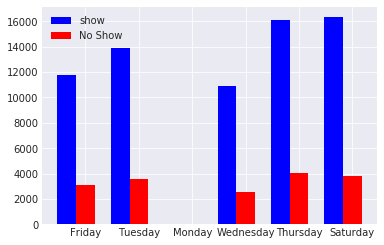

In [3]:
x=np.arange(1,(len(Show_count)+1),1)
# y=np.arange(len(no_Show_count))



plt.bar(x- 0.35/2 ,Show_count,width=0.35,color='b',tick_label=df.appointment_day.unique(), label='show')
plt.bar(x + 0.35/2 ,no_Show_count,width=0.35,color='r',tick_label=df.appointment_day.unique(), label='No Show')

plt.legend()


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

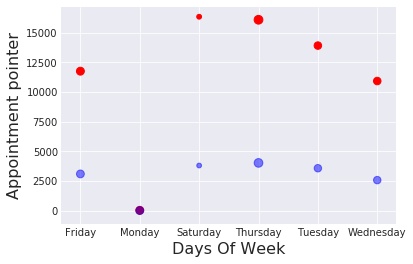

In [54]:
x=df.appointment_day.unique()



plt.scatter(x=x,y=Show_count,s=df.age,color='r',alpha=1)
plt.scatter(x=x,y=no_Show_count,s=df.age,c='b',alpha=0.5)


plt.xlabel('Days Of Week',fontsize=16)
plt.ylabel('Appointment pointer',fontsize=16)
plt

scholarship  no_show
0            No         62699
             Yes        15107
1            No          6288
             Yes         1964
Name: patientid, dtype: int64


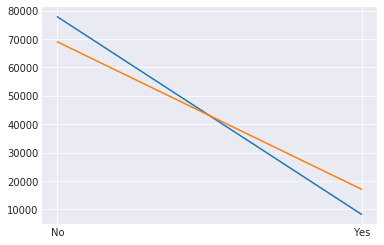

In [69]:
sclrshp_gpr=df.groupby(['scholarship']).patientid.count()
show_grp=df.groupby(['no_show']).patientid.count()

diagram_values=df.groupby(['scholarship','no_show']).count().patientid  
print(diagram_values)

plt.plot(sclrshp_gpr)
plt.plot(show_grp)

the above EDA shows which days have more inattend or not shown in appointments,
also it's explain the relation between whome have a scholrship or not with their show_appointment arrow.
so we can decide which day we can close place or do an offer to attract people on  

In [35]:
# save filterd data to a file
df.to_csv('noshowappointments_Filtered.csv')